In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Input, concatenate, add
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, History
from keras.datasets import mnist

Using TensorFlow backend.


# CNN需要用到的MODEL LAYER
## Conv2D、MaxPool2D:CNN必備
## Flatten:可以把參數展開變成一維
ex:(28, 28, 3) => (2352)
## GlobalAveragePooling2D:Resnet最後一層所用到的layer，可以將每一通道的平均取出。變成一維的通道數
ex:(28, 28, 3) => (3)
## ZeroPadding2D:因要嘗試Resnet，想說mnist的size太小，需要先padding，但跑太久而且好像train不起來就沒用到了

In [2]:
from keras.layers import Conv2D, MaxPool2D, Flatten, ZeroPadding2D, GlobalAveragePooling2D

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

## 做CNN記得要將input輸入通道數

In [4]:
x_train = x_train0.reshape(60000, 28, 28, 1)
x_test = x_test0.reshape(10000, 28, 28, 1)

In [5]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [6]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

## 縮小版的Resnet
![Image of Yaktocat](https://github.com/Fisher318/pythonHW/blob/master/skip2.JPG?raw=true)

In [7]:
c_1 = Conv2D(32, (5, 5), padding='same', activation='relu')
p_1 = MaxPool2D((2, 2))
c_2 = Conv2D(32, (3, 3), padding='same', activation='relu')
c_3 = Conv2D(32, (3, 3), padding='same', activation='relu')
c_4 = Conv2D(32, (3, 3), padding='same', activation='relu')
c_5 = Conv2D(32, (3, 3), padding='same', activation='relu')
c_6 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_7 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_8 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_9 = Conv2D(64, (3, 3), padding='same', activation='relu')
p_2 = GlobalAveragePooling2D()
f_1 = Dense(100, activation='relu')
f_2 = Dense(10, activation='softmax')

In [8]:
x = Input(shape=(28, 28, 1, ))
h_1 = c_1(x)
h_2 = p_1(h_1)

h_3 = c_2(h_2)
h_4 = c_3(h_3)
add_1 = add([h_2, h_4])
h_5 = c_4(add_1)
h_6 = c_5(h_5)
add_2 = add([h_6, add_1])
h_7 = c_6(add_2)
h_8 = c_7(h_7)
h_9 = c_8(h_8)
h_10 = c_9(h_9)
add_3 = add([h_10, h_8])
h_11 = p_2(add_3)
h_12 = f_1(h_11)
y = f_2(h_12)

In [9]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 14, 14, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 32)   9248        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_3 (

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, decay=1e-4, momentum=0.9), metrics=['accuracy'])

In [12]:
earlystopping = EarlyStopping(monitor='val_acc', 
                              patience=3, 
                              verbose=1, 
                              mode='max')

In [13]:
history = model.fit(x_train, y_train, 
           batch_size=1000, 
           epochs=100, 
           verbose = 1, 
           validation_data = (x_test, y_test), 
           callbacks=[earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 22s 360us/step - loss: 2.2983 - acc: 0.1816 - val_loss: 2.2894 - val_acc: 0.2601
Epoch 2/100
60000/60000 [==============================] - 17s 290us/step - loss: 2.2629 - acc: 0.1473 - val_loss: 2.2186 - val_acc: 0.1923
Epoch 3/100
60000/60000 [==============================] - 18s 296us/step - loss: 2.1602 - acc: 0.2286 - val_loss: 2.1073 - val_acc: 0.2210
Epoch 4/100
60000/60000 [==============================] - 18s 306us/step - loss: 1.8711 - acc: 0.2689 - val_loss: 1.6824 - val_acc: 0.3209
Epoch 5/100
60000/60000 [==============================] - 19s 313us/step - loss: 1.6186 - acc: 0.3794 - val_loss: 1.7167 - val_acc: 0.3536
Epoch 6/100
60000/60000 [==============================] - 19s 320us/step - loss: 1.2546 - acc: 0.5313 - val_loss: 0.9508 - val_acc: 0.6624
Epoch 7/100
60000/60000 [==============================] - 20s 330us/step - loss: 1.2533 - acc: 0.6624 - val_l

## 下面這張圖害我差點train到一半的時候關掉重來= =

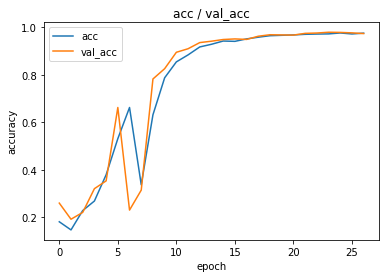

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('acc / val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc = 'best')
plt.show()

In [16]:
model_json = model.to_json()
open("CNN_test.json",'w').write(model_json)
model.save_weights("CNN_test.h5")

## 下面兩格就是原本打的Resnet，可惜不太能用。不過在需要擴增通道維度(打算用0)的地方還沒有解決，之後可以再回來研究看看(下圖虛線處)
![Image of Yaktocat](https://storage.googleapis.com/kaggle-datasets-images/6978/10038/d9e74a548a8cdca167b38520ac8bf405/data-original.png?t=2017-12-13-20-32-53)

x = Input(shape=(28, 28, 1, ))
p_x = z_1(x)
h_1 = c_1(p_x)
h_2 = p_1(h_1)

h_3 = c_2(h_2)
h_4 = c_3(h_3)
add_1 = add([h_2, h_4])
h_5 = c_4(add_1)
h_6 = c_5(h_5)
add_2 = add([h_6, add_1])
h_7 = c_6(add_2)
h_8 = c_7(h_7)
add_3 = add([h_8, add_2])
h_9 = c_8(add_3)
h_10 = c_9(h_9)
#add_4 = add([h_10, ])
h_11 = c_10(h_10)
h_12 = c_11(h_11)
add_5 = add([h_12, h_10])
h_13 = c_12(add_5)
h_14 = c_13(h_13)
add_6 = add([h_14, add_5])
h_15 = c_14(add_6)
h_16 = c_15(h_15)
add_7 = add([h_16, add_6])
h_17 = c_16(add_7)
h_18 = c_17(h_17)
#add_8 = add([h_18, ])
h_19 = c_18(h_18)
h_20 = c_19(h_19)
add_9 = add([h_20, h_18])
h_21 = c_20(add_9)
h_22 = c_21(h_21)
add_10 = add([h_22, add_9])
h_23 = c_22(add_10)
h_24 = c_23(h_23)
add_11 = add([h_24, add_10])
h_25 = c_24(add_11)
h_26 = c_25(h_25)
add_12= add([h_26, add_11])
h_27 = c_26(add_12)
h_28 = c_27(h_27)
add_13 = add([h_28, add_12])
h_29 = c_28(add_13)
h_30 = c_29(h_29)
#add_14 = add([h_30, ])
h_31 = c_30(h_30)
h_32 = c_31(h_31)
add_15 = add([h_32, h_30])
h_33 = c_32(add_15)
h_34 = c_33(h_33)
add_16 = add([h_34, add_15])
h_35 = p_2(add_16)
h_36 = f_1(h_35)
y = f_2(h_36)

z_1 = ZeroPadding2D((100, 100))
c_1 = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')
p_1 = MaxPool2D((3, 3), strides = (2, 2))
c_2 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_3 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_4 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_5 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_6 = Conv2D(64, (3, 3), padding='same', activation='relu')
c_7 = Conv2D(64, (3, 3), padding='same', activation='relu')
#想寫一個增加維度的
c_8 = Conv2D(128, (3, 3), strides = (2, 2), padding='same', activation='relu')
c_9 = Conv2D(128, (3, 3), padding='same', activation='relu')
c_10 = Conv2D(128, (3, 3), padding='same', activation='relu')
c_11 = Conv2D(128, (3, 3), padding='same', activation='relu')
c_12 = Conv2D(128, (3, 3), padding='same', activation='relu')
c_13 = Conv2D(128, (3, 3), padding='same', activation='relu')
c_14 = Conv2D(128, (3, 3), padding='same', activation='relu')
c_15 = Conv2D(128, (3, 3), padding='same', activation='relu')
#想寫一個增加維度的
c_16 = Conv2D(256, (3, 3), strides = (2, 2), padding='same', activation='relu')
c_17 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_18 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_19 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_20 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_21 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_22 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_23 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_24 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_25 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_26 = Conv2D(256, (3, 3), padding='same', activation='relu')
c_27 = Conv2D(256, (3, 3), padding='same', activation='relu')
#想寫一個增加維度的
c_28 = Conv2D(512, (3, 3), strides = (2, 2), padding='same', activation='relu')
c_29 = Conv2D(512, (3, 3), padding='same', activation='relu')
c_30 = Conv2D(512, (3, 3), padding='same', activation='relu')
c_31 = Conv2D(512, (3, 3), padding='same', activation='relu')
c_32 = Conv2D(512, (3, 3), padding='same', activation='relu')
c_33 = Conv2D(512, (3, 3), padding='same', activation='relu')
p_2 = GlobalAveragePooling2D()
f_1 = Dense(100, activation='relu')
f_2 = Dense(10, activation='softmax')